In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
train_dir = '/Users/chaitrabhat/Final_project/dataset/train80'
test_dir = '/Users/chaitrabhat/Final_project/dataset/test20'
categories = ['Panama Disease','cordana','healthy','pestalotiopsis','sigatoka','xamthomonas']
img_size = (250, 250)
batch_size = 32
train_gen = ImageDataGenerator(
    rescale=1./250,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = ImageDataGenerator(rescale=1./250)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
class_labels = train_data.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_labels),
    y=class_labels
)
class_weights = dict(enumerate(class_weights))
base_model = tf.keras.applications.MobileNetV2(input_shape=(250, 250, 3), include_top=False, weights='imagenet')
base_model.trainable = True

for layer in base_model.layers[:-50]:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.6),
    Dense(len(categories), activation='softmax')
])
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Step 6: Train the Model
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_data,
    epochs=25,
    callbacks=[early_stopping],
    class_weight=class_weights
)


Found 4800 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


/var/folders/vz/t9w_mbv17cn2bx332lczvwyh0000gn/T/ipykernel_6505/3657281508.py:49: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(250, 250, 3), include_top=False, weights='imagenet')
/Users/chaitrabhat/Banana_Project/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 55s 346ms/step - accuracy: 0.5076 - loss: 3.5432
Epoch 2/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 54s 360ms/step - accuracy: 0.8700 - loss: 2.4538
Epoch 3/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 55s 364ms/step - accuracy: 0.9187 - loss: 2.0919
Epoch 4/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 56s 374ms/step - accuracy: 0.9298 - loss: 1.8482
Epoch 5/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 57s 376ms/step - accuracy: 0.9519 - loss: 1.5989
Epoch 6/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 58s 386ms/step - accuracy: 0.9565 - loss: 1.4304
Epoch 7/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 59s 395ms/step - accuracy: 0.9572 - loss: 1.2480
Epoch 8/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 63s 418ms/step - accuracy: 0.9640 - loss: 1.0943
Epoch 9/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 63s 421ms/step - accuracy: 0.9619 - loss: 0.9674
Epoch 10/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 64s 426ms/step - accuracy: 0.9657 - loss: 0.8449
Epoch 11/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 64s 425ms/step - accuracy: 0.9678 - loss: 0.7299
Epoch 12/25
150/150

38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 234ms/step - accuracy: 0.9590 - loss: 0.2326



Final Test Accuracy: 0.9583 | Test Loss: 0.2449
Final Training Accuracy: 0.9867


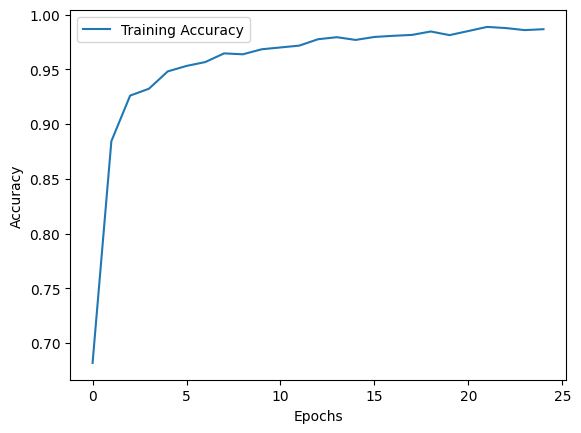

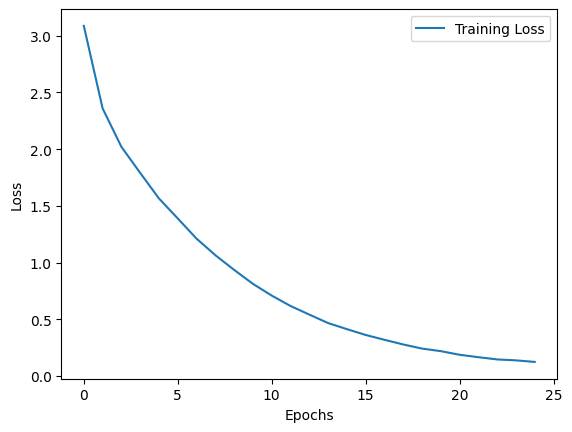


 Predicting test data for evaluation...
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 219ms/step

 Classification Report:
                precision    recall  f1-score   support

Panama Disease     0.9612    0.9900    0.9754       200
       cordana     1.0000    0.9100    0.9529       200
       healthy     0.9529    0.9100    0.9309       200
pestalotiopsis     0.8811    1.0000    0.9368       200
      sigatoka     0.9899    0.9850    0.9875       200
   xamthomonas     0.9795    0.9550    0.9671       200

      accuracy                         0.9583      1200
     macro avg     0.9608    0.9583    0.9584      1200
  weighted avg     0.9608    0.9583    0.9584      1200


 Confusion Matrix:


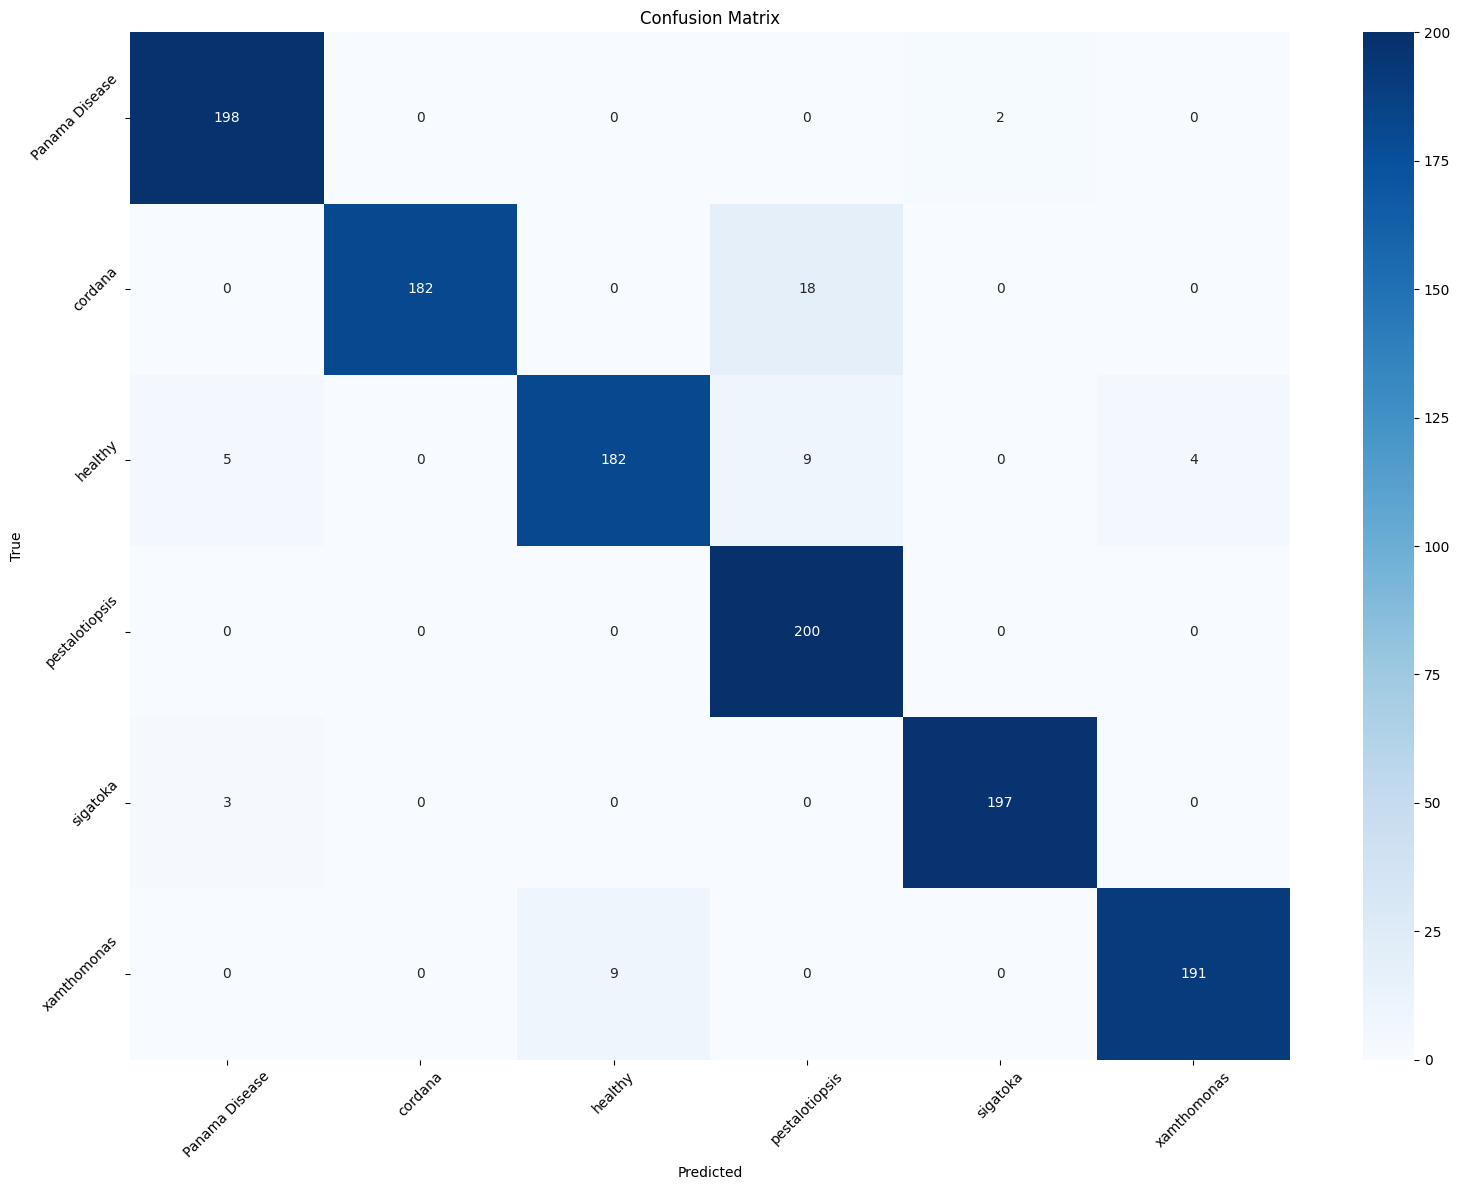

In [4]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f} | Test Loss: {test_loss:.4f}")
train_accuracy = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {train_accuracy:.4f}")
model.save('/Users/chaitrabhat/Final_project/models/MobileNet_banana_classification_model80.h5')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Classification report & confusion matrix
print("\n Predicting test data for evaluation...")
y_true = test_data.classes
y_probs = model.predict(test_data)
y_pred = np.argmax(y_probs, axis=1)

print("\n Classification Report:")
report = classification_report(y_true, y_pred, target_names=categories, digits=4)
print(report)

print("\n Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
def predict_image(image_path):
    from tensorflow.keras.utils import load_img, img_to_array
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    class_idx = tf.argmax(predictions[0]).numpy()
    return categories[class_idx]

# Test with a sample image
sample_image_path = '/Users/chaitrabhat/Final_project/dataset/test20/Panama Disease/0001.jpg'
print("Predicted Class:", predict_image(sample_image_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
Predicted Class: Panama Disease
